In [1]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [17]:
df = web.DataReader('AAL', data_source='yahoo', start='2020-08-01', end='2020-09-30')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-31,11.25,10.80,11.16,11.12,51835500,11.12
2020-08-03,11.24,10.71,11.07,11.08,48264000,11.08
2020-08-04,11.88,11.16,11.21,11.47,54824400,11.47
2020-08-05,12.85,11.55,11.84,12.56,118704400,12.56
2020-08-06,13.29,12.47,13.04,13.04,131280100,13.04
2020-08-07,13.16,12.58,12.86,13.03,61401200,13.03
2020-08-10,14.31,13.21,13.29,14.00,121073900,14.00
2020-08-11,15.10,13.55,15.02,13.73,127879300,13.73
2020-08-12,14.06,13.10,14.03,13.54,77639200,13.54


In [18]:
df.shape

(43, 6)

In [19]:
df = df[['Adj Close']]
print(df.tail())

            Adj Close
Date                 
2020-09-24      11.77
2020-09-25      12.29
2020-09-28      12.76
2020-09-29      12.25
2020-09-30      12.29


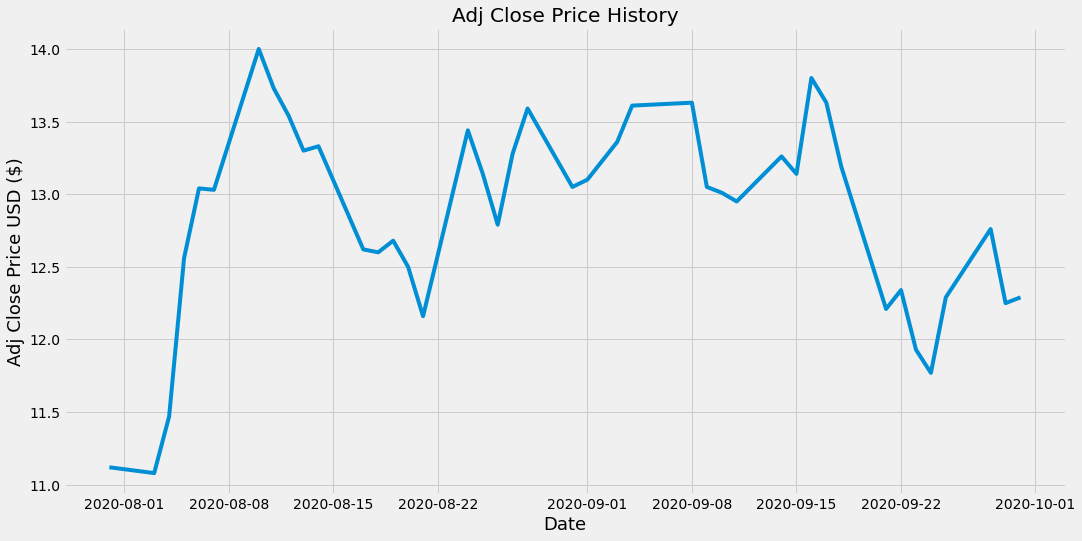

In [20]:
plt.figure(figsize=(16,8))
plt.title('Adj Close Price History')
plt.plot(df['Adj Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close Price USD ($)', fontsize=18)
plt.show()

In [6]:
forecast_out = 10
df['Prediction'] = df[['Adj Close']].shift(-forecast_out)

print(df.tail())

            Adj Close  Prediction
Date                             
2020-03-24      13.92         NaN
2020-03-25      15.39         NaN
2020-03-26      15.66         NaN
2020-03-27      14.04         NaN
2020-03-30      12.25         NaN


In [7]:
X = np.array(df.drop(['Prediction'],1))

X = X[:-forecast_out]
print(X)

[[26.74117851]
 [27.05999947]
 [28.43000031]
 [29.10000038]
 [28.29999924]
 [28.37999916]
 [28.79000092]
 [29.84000015]
 [30.46999931]
 [30.09000015]
 [29.20000076]
 [28.62999916]
 [28.32999992]
 [28.51000023]
 [27.81999969]
 [25.45000076]
 [23.12000084]
 [22.30999947]
 [20.60000038]
 [19.04999924]
 [18.86000061]
 [17.85000038]
 [18.53000069]
 [16.04000092]
 [15.97000027]
 [14.75      ]
 [17.        ]
 [16.26000023]
 [13.44999981]
 [14.31000042]
 [15.92000008]]


In [8]:
y = np.array(df['Prediction'])

y = y[:-forecast_out]
print(y)

[29.20000076 28.62999916 28.32999992 28.51000023 27.81999969 25.45000076
 23.12000084 22.30999947 20.60000038 19.04999924 18.86000061 17.85000038
 18.53000069 16.04000092 15.97000027 14.75       17.         16.26000023
 13.44999981 14.31000042 15.92000008 15.57999992 11.64999962 10.28999996
 10.38000011 10.25       13.92000008 15.39000034 15.65999985 14.03999996
 12.25      ]


In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
svr_rbf = SVR(kernel='rbf') 
svr_rbf.fit(x_train, y_train)

SVR()

In [11]:
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.006309284382167379


In [12]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [13]:
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.2629263060791923


In [14]:
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)


[[15.57999992]
 [11.64999962]
 [10.28999996]
 [10.38000011]
 [10.25      ]
 [13.92000008]
 [15.39000034]
 [15.65999985]
 [14.03999996]
 [12.25      ]]


In [15]:
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

[11.85167104  8.98574071  7.99396871  8.05960081  7.96479897 10.64112561
 11.71311493 11.91001053 10.72863484  9.42328757]


In [16]:
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[13.76974332 14.66524868 15.09135557 15.06427704 15.10330908 14.02076705
 13.78555362 13.76413708 13.99463086 14.4763295 ]
